# Skin Disease Classifier (HAM10000) - A Detailed Walkthrough
**Filename:** `skin_disease_classifier_detailed.ipynb`  
**Author / Team:** Ayushmitra (Pushkar Kumar & team)  
**Purpose:** To train a Convolutional Neural Network (CNN) to classify 7 types of common skin lesions using the HAM10000 image dataset. This notebook provides a detailed, step-by-step guide using the Transfer Learning technique with the MobileNetV2 architecture.

**Workflow:**
1.  **Setup & Data Acquisition:** Configure the environment and download the dataset.
2.  **Exploration & Preprocessing:** Load the metadata, map the image paths, and prepare the data for modeling.
3.  **Class Imbalance Handling:** Address the skewed data distribution using undersampling.
4.  **Data Augmentation:** Create image generators to feed data to the model and artificially expand our training set.
5.  **Transfer Learning:** Build a powerful CNN by leveraging a pre-trained model (MobileNetV2).
6.  **Training & Evaluation:** Train the model and evaluate its performance.
7.  **Saving Artifacts:** Save the final trained model and class mappings for future use.

## 1.1 Mount Google Drive
We begin by mounting Google Drive. This allows our Colab notebook to access files stored in Drive and, more importantly, to save our final trained model there.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2 Setup Kaggle API
To download the dataset directly and efficiently, we will use the official Kaggle API. This requires your personal `kaggle.json` API token, which you can generate from your Kaggle account settings.

In [2]:
from google.colab import files
import os

print("Please upload your kaggle.json file:")
# Prompt to upload the file from your local machine
files.upload()

# Create the necessary directory and move the token file into it
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("\n✅ Kaggle API is now configured.")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json

✅ Kaggle API is now configured.


## 1.3 Import Libraries
Here, we import all the necessary Python libraries for data manipulation (`pandas`), numerical operations (`numpy`), visualization (`matplotlib`), and building our deep learning model with TensorFlow and Keras.

In [3]:
# Data Handling and Visualization
import numpy as np
import pandas as pd
import os
import zipfile
import json
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Deep Learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


## 2.1 Download and Unzip the Dataset
Using the configured Kaggle API, we download the HAM10000 dataset and unzip its contents into our Colab environment.

In [4]:
# The '-p .' flag downloads to the current directory, and '--unzip' automatically extracts it
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 -p . --unzip
print("✅ Dataset downloaded and unzipped successfully.")

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.19G/5.20G [02:39<00:00, 123MB/s]
100% 5.20G/5.20G [02:39<00:00, 35.1MB/s]
✅ Dataset downloaded and unzipped successfully.


## 2.2 Load Metadata and Map File Paths
The dataset contains a CSV file with metadata for each image. We load this file into a pandas DataFrame. Since the images are in two separate folders, we'll create a new 'path' column in our dataframe that maps each `image_id` to its correct file location.

In [5]:
# Load the metadata
df = pd.read_csv('HAM10000_metadata.csv')

# Create a dictionary mapping each image_id to its full file path
image_paths = {os.path.splitext(f)[0]: os.path.join(folder, f)
               for folder in ['ham10000_images_part_1', 'ham10000_images_part_2']
               for f in os.listdir(folder)}

# Add the 'path' column to our dataframe
df['path'] = df['image_id'].map(image_paths.get)

print("Dataset Metadata Sample with File Paths:")
display(df.head())

Dataset Metadata Sample with File Paths:


,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,ham10000_images_part_1/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,ham10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,ham10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,ham10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,ham10000_images_part_2/ISIC_0031633.jpg


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('lesion_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('image_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('localization').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('lesion_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='lesion_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('image_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='image_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('localization')):
  _plot_series(series, series_name, i)
  fig.legend(title='localization', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('path')):
  _plot_series(series, series_name, i)
  fig.legend(title='path', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['image_id'].value_counts()
    for x_label, grp in _df_13.groupby('lesion_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('lesion_id')
_ = plt.ylabel('image_id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['localization'].value_counts()
    for x_label, grp in _df_14.groupby('image_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('image_id')
_ = plt.ylabel('localization')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['path'].value_counts()
    for x_label, grp in _df_15.groupby('localization')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('localization')
_ = plt.ylabel('path')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['lesion_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='lesion_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['image_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='image_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['localization'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='localization', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['path'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='path', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 2.3 Create Human-Readable Labels
The 'dx' column contains abbreviations for the skin lesion types. We'll create a new 'cell_type' column with the full, descriptive names for better readability and for use as our class labels.

In [6]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
df['cell_type'] = df['dx'].map(lesion_type_dict.get)

print("Dataframe with full cell_type names:")
display(df[['image_id', 'dx', 'cell_type']].head())

Dataframe with full cell_type names:


,image_id,dx,cell_type
0,ISIC_0027419,bkl,Benign keratosis-like lesions
1,ISIC_0025030,bkl,Benign keratosis-like lesions
2,ISIC_0026769,bkl,Benign keratosis-like lesions
3,ISIC_0025661,bkl,Benign keratosis-like lesions
4,ISIC_0031633,bkl,Benign keratosis-like lesions


from matplotlib import pyplot as plt
_df_20['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('image_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('image_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='image_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_23['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['image_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='image_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 3.1 Address Class Imbalance
A major challenge in this dataset is that it's highly imbalanced. The 'Melanocytic nevi' class dominates the dataset. If we train on this directly, our model will become excellent at predicting 'nevi' but terrible at predicting the rare, more dangerous classes like 'Melanoma'.

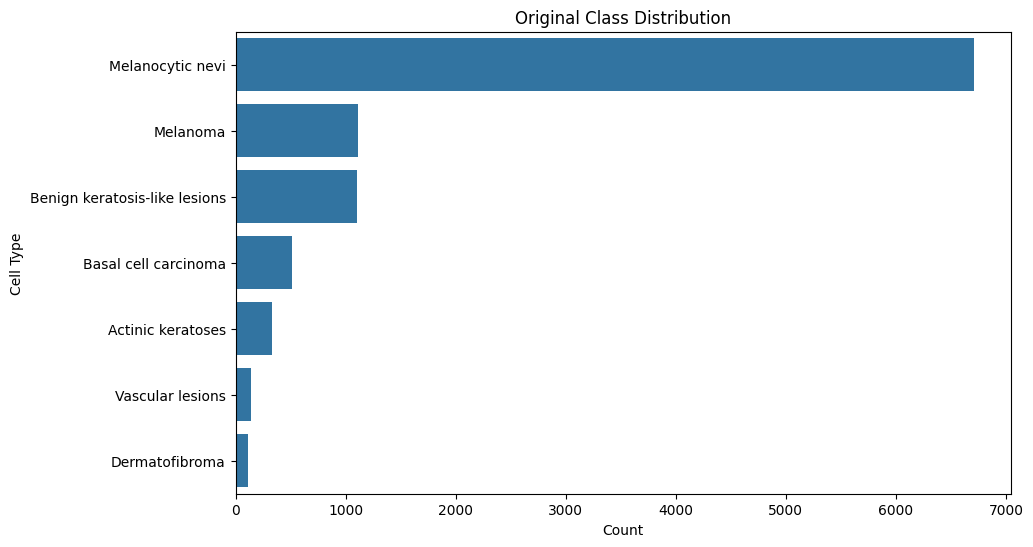

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['cell_type'], order = df['cell_type'].value_counts().index)
plt.title('Original Class Distribution')
plt.xlabel('Count')
plt.ylabel('Cell Type')
plt.show()

## 3.2 Perform Undersampling
To solve the imbalance, we will use **undersampling**. We will reduce the number of samples from the majority class ('Melanocytic nevi') to be more in line with the other classes. This creates a balanced dataset that prevents the model from being biased.

In [8]:
# Separate the majority class from the minority classes
df_majority = df[df['dx'] == 'nv']
minority_classes = [df[df['dx'] == label] for label in df['dx'].unique() if label != 'nv']

# Undersample the majority class to have 800 samples (a more balanced number)
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=800,     # to match minority class size
                                 random_state=42) # for reproducible results

# Combine the downsampled majority class with all minority classes
df_balanced = pd.concat([df_majority_downsampled] + minority_classes)

print("Shape of the new balanced dataframe:", df_balanced.shape)

Shape of the new balanced dataframe: (4110, 9)


## 3.3 Verify Balanced Distribution
Let's visualize the class distribution again to confirm our undersampling was successful.

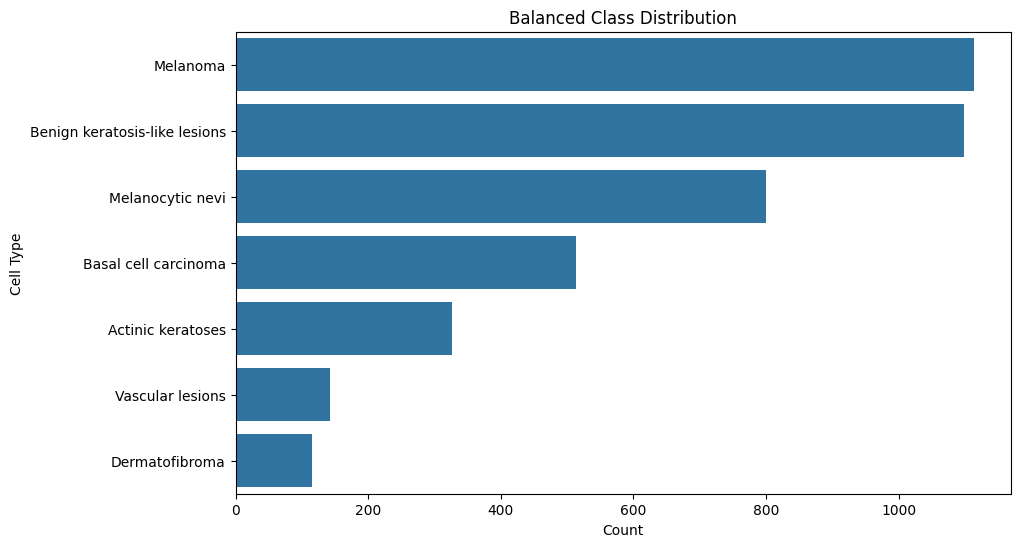

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df_balanced['cell_type'], order = df_balanced['cell_type'].value_counts().index)
plt.title('Balanced Class Distribution')
plt.xlabel('Count')
plt.ylabel('Cell Type')
plt.show()

## 3.4 Split Data into Training and Validation Sets
Now that our data is balanced, we split it into a training set (which the model learns from) and a validation set (which we use to evaluate the model's performance during training).

In [10]:
train_df, val_df = train_test_split(
    df_balanced,
    test_size=0.2,       # 20% for validation
    random_state=42,
    stratify=df_balanced['cell_type'] # Ensures both sets have similar class distributions
)

print(f"Total balanced samples: {df_balanced.shape[0]}")
print(f"Training samples: {train_df.shape[0]}")
print(f"Validation samples: {val_df.shape[0]}")

Total balanced samples: 4110
Training samples: 3288
Validation samples: 822


## 4.1 Prepare Image Data Generators with Augmentation
To make our model more robust, we use **Data Augmentation**. This technique creates slightly modified versions of our training images on-the-fly (e.g., random rotations, zooms, flips). This teaches the model to recognize a skin lesion even if it's photographed from a different angle or lighting, which helps prevent overfitting. We use Keras's `ImageDataGenerator` to handle this process.

In [11]:
IMG_SIZE = 224 # The input size expected by our pre-trained model, MobileNetV2

# Set up data augmentation for the training generator
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values from 0-255 to 0-1
    rotation_range=40,       # Randomly rotate images
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Apply shear transformations
    zoom_range=0.2,          # Randomly zoom in on images
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'
)

# For the validation data, we ONLY normalize the pixel values. We do not augment it.
val_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators that will flow data from our dataframe to the model
train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col='path', y_col='cell_type',
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=32,
    class_mode='categorical', shuffle=True
)

validation_generator = val_datagen.flow_from_dataframe(
    val_df, x_col='path', y_col='cell_type',
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=32,
    class_mode='categorical', shuffle=False
)

print("✅ Image generators are ready.")

Found 3288 validated image filenames belonging to 7 classes.
Found 822 validated image filenames belonging to 7 classes.
✅ Image generators are ready.


## 5.1 Build Model using Transfer Learning
Training a deep learning model for images from scratch requires a massive dataset (like millions of images) and huge computational power. We use a shortcut called **Transfer Learning**. We take a world-class model that has already been trained on the ImageNet dataset (1.4 million images) and repurpose it for our task. Think of it as hiring an expert who already knows how to see basic shapes, textures, and colors. We just need to teach them how to apply that knowledge specifically to skin lesions.

In [12]:
# We will use MobileNetV2, which is powerful yet lightweight.
# `include_top=False` removes the original final classification layer.
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# We freeze the layers of the pre-trained model. We don't want to change its existing knowledge.
base_model.trainable = False

print("✅ Base model loaded and frozen.")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✅ Base model loaded and frozen.


## 5.2 Add Custom Classification Head
Now, we add our own new layers on top of the frozen base model. These are the only layers that will be trained. This "head" will learn to take the expert features from the base model and make a final decision about which of the 7 skin lesion types it is.

In [13]:
# `GlobalAveragePooling2D` reduces the feature map dimensions
# `Dense` layers are the standard fully-connected layers for decision making
# `Dropout` is a regularization technique to prevent overfitting
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
# The final layer uses 'softmax' activation for multi-class probability output
predictions = Dense(7, activation='softmax')(x)

# This is our final model
model = Model(inputs=base_model.input, outputs=predictions)

print("✅ Custom classification head added.")

✅ Custom classification head added.


## 5.3 Compile the Model
Before we can train the model, we need to compile it with an optimizer, a loss function, and metrics.
- **Optimizer (`Adam`):** An efficient algorithm for finding the optimal weights for the network.
- **Loss Function (`categorical_crossentropy`):** The standard choice for multi-class classification problems. It measures how wrong the model's predictions are.
- **Metrics (`accuracy`):** The metric we want to track during training.

In [14]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model Summary:")
model.summary()

Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,576,903 (13.64 MB)

 Trainable params: 1,318,919 (5.03 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## 6.1 Train the Model
This is the main training step where the model learns from the data. For the best performance, ensure you are using a GPU runtime in Colab (**Runtime -> Change runtime type -> T4 GPU**). This process will take several minutes.

In [15]:
# We'll train for 15 epochs. This can be increased for better performance if needed.
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=15
)

print("\n✅ Model training complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.3502 - loss: 1.9187 - val_accuracy: 0.5275 - val_loss: 1.3041
Epoch 2/15
  1/102 ━━━━━━━━━━━━━━━━━━━━ 2:37 2s/step - accuracy: 0.5000 - loss: 1.2998

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 382ms/step - accuracy: 0.5000 - loss: 1.2998 - val_accuracy: 0.5175 - val_loss: 1.3033
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.5020 - loss: 1.3164 - val_accuracy: 0.5600 - val_loss: 1.2203
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 89s 871ms/step - accuracy: 0.4688 - loss: 1.2330 - val_accuracy: 0.5587 - val_loss: 1.2201
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.5101 - loss: 1.2569 - val_accuracy: 0.5525 - val_loss: 1.2174
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 397ms/step - accuracy: 0.5000 - loss: 1.2248 - val_accuracy: 0.5500 - val_loss: 1.2272
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.5227 - loss: 1.2423 - val_accuracy: 0.5337 - val_loss: 1.2879
Epoch 8/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 42s 409ms/step - accuracy: 0.5000 - loss: 1.2263 - val_accuracy: 0.5238 - val_loss: 1.2849
Epoch 9/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.5368 - loss: 1.1906 - val_accurac

## 7.1 Evaluate Model Performance
Let's plot the training and validation accuracy/loss over time. This helps us visualize how well the model learned and check for signs of overfitting.

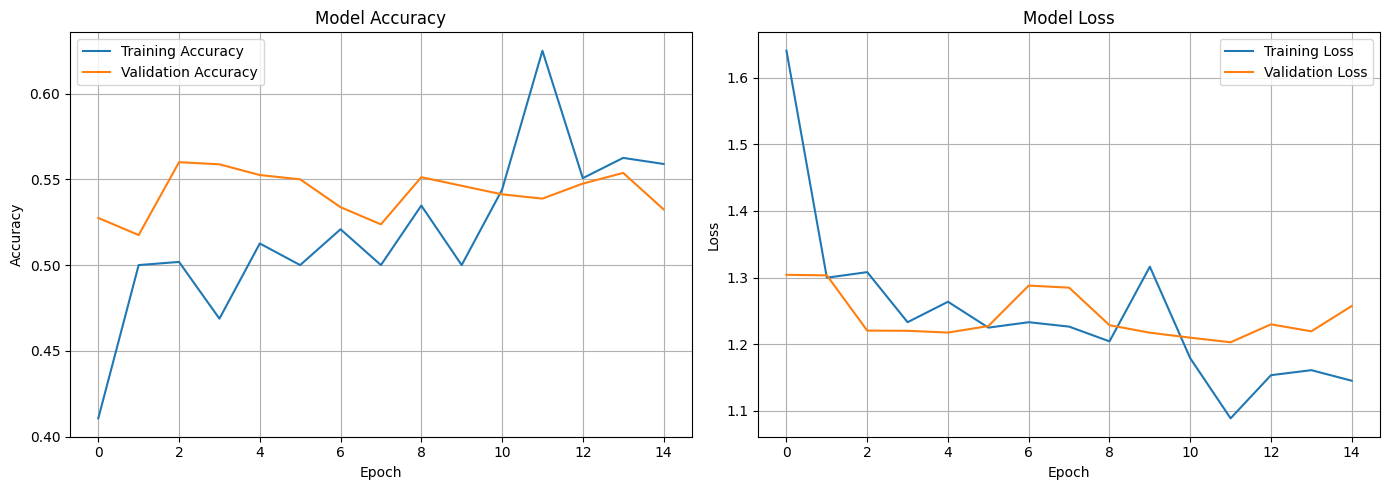

In [16]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 7.2 Save the Final Model and Class Indices
Finally, we save our trained model as an `.h5` file. We also save the mapping of class indices (e.g., 0, 1, 2...) to class names ('Melanoma', 'Basal cell carcinoma'...). This JSON file is crucial for our backend to interpret the model's output correctly.

In [ ]:
# Define the save path in your Google Drive, matching your project structure
model_save_dir = "/content/drive/MyDrive/SIH_2025/Ayushmitra_Models/skin_disease_classifier"
os.makedirs(model_save_dir, exist_ok=True)

# Save the full model
model.save(os.path.join(model_save_dir, "skin_classifier_model.h5"))

# Save the class indices (mapping from index to class name)
class_indices = train_generator.class_indices
index_to_class = {str(v): k for k, v in class_indices.items()} # Keys must be strings for JSON
with open(os.path.join(model_save_dir, 'class_indices.json'), 'w') as f:
    json.dump(index_to_class, f)


print(f"\n✅ Final model and class indices saved to: {model_save_dir}")
print("Class mapping saved:", index_to_class)